# Machine Learning Prediction

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [6]:
data = pd.read_csv('1830151.csv') #loading data
data.shape 

(50000, 19)

General info about data

In [7]:
data.describe() 

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999600e+04,50000.000000
mean,2019.200080,2.010718e+09,2.019247e+07,2.019250e+07,2.019265e+07,1.0,NaN,32411.668192,2.019250e+07,2.010119e+09,0.080820
std,0.400064,2.827267e+08,3.873712e+03,3.862553e+03,3.879063e+03,0.0,NaN,39973.567563,3.862947e+03,2.746868e+08,0.272561
min,2019.000000,1.928500e+09,2.018123e+07,2.018113e+07,2.018121e+07,1.0,NaN,0.270000,2.018113e+07,1.928500e+09,0.000000
25%,2019.000000,1.929234e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4719.135000,2.019042e+07,1.929234e+09,0.000000
50%,2019.000000,1.929807e+09,2.019080e+07,2.019081e+07,2.019082e+07,1.0,NaN,17362.555000,2.019081e+07,1.929807e+09,0.000000
75%,2019.000000,1.930396e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,46845.565000,2.019112e+07,1.930395e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020070e+07,1.0,NaN,792766.350000,2.020052e+07,2.960636e+09,1.000000


In [8]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S corp,NaN,2020.0,1.930855e+09,2020-05-04,20200503,20200504,20200519.0,USD,RV,1.0,NaN,142.89,20200504.0,NAA8,1.930855e+09,1
49996,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930584e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,19732.43,20200301.0,NAH4,1.930584e+09,1
49997,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930764e+09,2020-04-10,20200408,20200410,20200425.0,USD,RV,1.0,NaN,62295.39,20200410.0,NAH4,1.930764e+09,1
49998,U001,200799367,MCL corp,NaN,2020.0,1.930824e+09,2020-04-24,20200424,20200424,20200215.0,USD,RV,1.0,NaN,26738.53,20200131.0,NAA8,1.930824e+09,1


In [9]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [10]:
df=data.copy()

In [11]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0


Converting all dates to datetime format

In [12]:
def con_date_time(df):
    df['clear_date']=pd.to_datetime(df['clear_date'])
    df['posting_date']=pd.to_datetime(df['posting_date'])
    df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d', errors='ignore')
    df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d', errors='ignore')
    df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d', errors='ignore')
    df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d', errors='ignore')
    df['buisness_year']=df['buisness_year'].astype(int)
    return None

In [13]:
con_date_time(df)

In [14]:
df.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10,2019,1.929535e+09,2019-06-24,2019-06-24,2019-06-24,2019-07-09,USD,RV,1.0,NaN,52499.91,2019-06-24,NAA8,1.929535e+09,0


In [15]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

Dropping Extra document create date column and sorting for distribution

In [16]:
df.drop(['document_create_date'],axis=1,inplace=True)
df=df.sort_values(by='document_create_date.1',ignore_index=True)
df=df.rename(columns={'document_create_date.1':'document_create_date'})

In [17]:
data_train=df.loc[data['clear_date'].notna()]
data_train=data_train.reset_index(drop=True)
data_null_cleardate=df.loc[data['clear_date'].isna()]
data_null_cleardate=data_null_cleardate.reset_index(drop=True)

Removing anomalies in the data

In [18]:
df=data_train.copy()
df=(df.loc[df['document_create_date']<=df['posting_date']].loc[df['posting_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['due_in_date']].loc[df['baseline_create_date']<=df['clear_date']])

In [19]:
df['due_duration']=(df['clear_date']-df['due_in_date']).dt.days
df=df.drop(['clear_date'],axis=1)

### Initital EDA

In [20]:
drop = [] # list of columns to be dropped

In [21]:
for i in df.columns:
    if bool(list(df[i].isna().value_counts().index)[0]):
        print(i)  

area_business


In [22]:
drop.append("area_business")

In [23]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<100:
        print()
        print(df[i].value_counts())
    print()

business_code
6

U001    41441
CA02     3565
U013      674
U002      127
U005       10
U007        2
Name: business_code, dtype: int64

cust_number
1408

name_customer
4235

buisness_year
2

2019    39875
2020     5944
Name: buisness_year, dtype: int64

doc_id
45819

posting_date
420

document_create_date
420

due_in_date
493

invoice_currency
2

USD    42253
CAD     3566
Name: invoice_currency, dtype: int64

document type
1

RV    45819
Name: document type, dtype: int64

posting_id
1

1.0    45819
Name: posting_id, dtype: int64

area_business
0

Series([], Name: area_business, dtype: int64)

total_open_amount
41475

baseline_create_date
430

cust_payment_terms
72

NAA8    18388
NAH4    12008
CA10     3483
NAC6     1571
NAM4     1291
        ...  
NATW        1
NAUN        1
NATM        1
NABD        1
B112        1
Name: cust_payment_terms, Length: 72, dtype: int64

invoice_id
45819

isOpen
1

0    45819
Name: isOpen, dtype: int64

due_duration
179



In [24]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                     float64
area_business                  float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
due_duration                     int64
dtype: object

In [25]:
dfc=df.select_dtypes(include=['float64','int64']).copy()

### Constant Features

In [26]:
sel = VarianceThreshold(threshold=0)
sel.fit(dfc) 
sum(sel.get_support())
len(dfc.columns[sel.get_support()])
print(
    len([
        x for x in dfc.columns
        if x not in dfc.columns[sel.get_support()]
    ]))

q=[x for x in dfc.columns if x not in dfc.columns[sel.get_support()]]
q

3


/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


['posting_id', 'area_business', 'isOpen']

In [27]:
for i in q:
    drop.append(i)

### Quasi Constant

In [28]:
sel = VarianceThreshold(threshold=0.4)
sel.fit(dfc) 
sum(sel.get_support())
len(dfc.columns[sel.get_support()])
print(
    len([
        x for x in dfc.columns
        if x not in dfc.columns[sel.get_support()]
    ]))

q=[x for x in dfc.columns if x not in dfc.columns[sel.get_support()]]
q

4


/home/xandier/.local/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


['buisness_year', 'posting_id', 'area_business', 'isOpen']

In [29]:
# none right now

## Splitting

In [30]:
x_train, x_test_init = train_test_split(
    df,
    test_size=0.3,
    shuffle=False)
x_train.shape,  x_test_init.shape

((32073, 18), (13746, 18))

In [31]:
x_val, x_test = train_test_split(
    x_test_init,
    test_size=0.5,
    shuffle=False)

x_val.shape, x_test.shape

((6873, 18), (6873, 18))

### Feature Engg

In [32]:
df=x_train.copy()
a=df
# Encoding String terms
code_business_code = {k: i for i, k in enumerate(a.business_code.unique(), 1)}
code_cust_payment_terms = {k: i for i, k in enumerate(a.cust_payment_terms.unique(), 1)}
code_cust_number = {k: i for i, k in enumerate(a.cust_number.unique(), 1)}
code_name_customer = {k: i for i, k in enumerate(a.name_customer.unique(), 1)}

def encoding(df_obj):
    df_obj.loc[:, 'code_business_code'] = df_obj.loc[:, 'business_code'].map(code_business_code)
    df_obj.loc[:, 'code_cust_payment_terms'] = df_obj.loc[:, 'cust_payment_terms'].map(code_cust_payment_terms)
    df_obj.loc[:, 'code_cust_number'] = df_obj.loc[:, 'cust_number'].map(code_cust_number)
    df_obj.loc[:, 'code_name_customer'] = df_obj.loc[:, 'name_customer'].map(code_name_customer)
    return None

# creating fetures from date
def dates_feature(df_dates):
    df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week.astype(int)
    df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week.astype(int)
    df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week.astype(int)
    df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week.astype(int)
    return None

encoding(df)
dates_feature(df)


In [33]:
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)


In [34]:
for i in ['posting_date','document_create_date','due_in_date','baseline_create_date','name_customer','cust_number','cust_payment_terms','business_code']:
    drop.append(i)

In [35]:
mapper1=df.groupby('code_cust_number')['due_duration'].mean()
mapper2=df.groupby('code_name_customer')['due_duration'].mean()

df['cust_delay_mean']=df['code_cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['code_name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days

mappingData = [mapper1,mapper2]

In [36]:
import pickle
with open("mapper", 'wb') as f:
    pickle.dump(mappingData, f)

In [37]:
df['conv_amt']=df['total_open_amount'].copy()
df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78

In [38]:
df['cust_number'].loc[df['cust_number'].str.isdigit()!=True]

18       CCU013
35       CCU013
61       CCU013
62       CC5050
114      CC7470
          ...  
32029    CCU013
32091    CCU013
32092    CCU013
32114    CCU002
32121    CCU013
Name: cust_number, Length: 1122, dtype: object

<AxesSubplot:xlabel='cust_payment_terms', ylabel='count'>

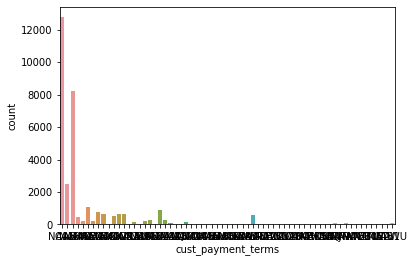

In [39]:
sns.countplot(x='cust_payment_terms',data=df)

<AxesSubplot:xlabel='business_code', ylabel='count'>

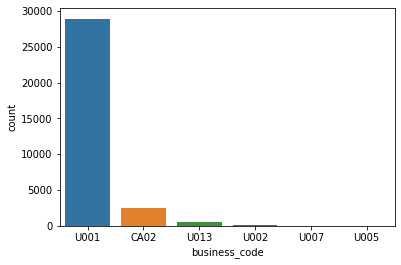

In [40]:
sns.countplot(x='business_code',data=df)

<AxesSubplot:xlabel='cust_number', ylabel='count'>

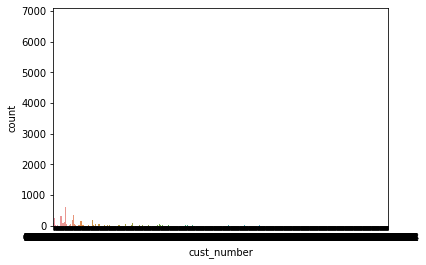

In [41]:
sns.countplot(x='cust_number',data=df)

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

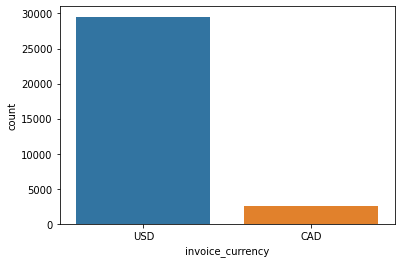

In [42]:
sns.countplot(x='invoice_currency',data=df)

In [43]:
corr=df.corr().abs()

u=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
u

<ipython-input-43-7c2248fed8e4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  u=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,due_duration,code_business_code,code_cust_payment_terms,...,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week,document_create_is_working,due_in_is_working,cust_delay_mean,cust_name_delay_mean,payment_time,conv_amt
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,NaN,NaN,NaN,0.185018,1.000000,NaN,0.134165,0.664496,0.102375,...,0.015028,0.011937,0.001484,0.015067,0.003407,0.063419,0.193867,0.172317,0.097777,0.107574
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,NaN,NaN,NaN,NaN,NaN,0.185018,NaN,0.000319,0.104911,0.130131,...,0.003763,0.004740,0.022845,0.003055,0.009543,0.010747,0.008375,0.010076,0.085226,0.991581
invoice_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134165,0.664496,0.102375,...,0.015028,0.011937,0.001484,0.015067,0.003407,0.063419,0.193867,0.172317,0.097777,0.107574
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
due_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152613,0.140586,...,0.006417,0.013001,0.001147,0.013254,0.003548,0.004009,0.692572,0.740264,0.170181,0.007322
code_business_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012384,...,0.006914,0.000873,0.015221,0.004637,0.019900,0.041604,0.220556,0.192113,0.106154,0.054103
code_cust_payment_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020970,0.009189,0.012719,0.015484,0.045052,0.033072,0.024674,0.041232,0.716410,0.129606


In [44]:

print([column for column in u.columns if any(u[column] ==1)])


['invoice_id', 'document_create_date_month', 'document_create_date_day', 'document_create_date_year', 'document_create_date_quarter', 'document_create_date_dayofweek', 'document_create_date_week']


In [45]:
drop.append('invoice_id')

In [46]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    if df[i].nunique()<6:
        print(df[i].value_counts())
    print()

business_code
6

cust_number
1301

name_customer
3684

buisness_year
1
2019    32073
Name: buisness_year, dtype: int64

doc_id
32073

posting_date
283

document_create_date
283

due_in_date
342

invoice_currency
2
USD    29525
CAD     2548
Name: invoice_currency, dtype: int64

document type
1
RV    32073
Name: document type, dtype: int64

posting_id
1
1.0    32073
Name: posting_id, dtype: int64

area_business
0
Series([], Name: area_business, dtype: int64)

total_open_amount
29191

baseline_create_date
290

cust_payment_terms
65

invoice_id
32073

isOpen
1
0    32073
Name: isOpen, dtype: int64

due_duration
175

code_business_code
6

code_cust_payment_terms
65

code_cust_number
1301

code_name_customer
3684

posting_date_month
11

posting_date_day
31

posting_date_year
2
2019    31938
2018      135
Name: posting_date_year, dtype: int64

posting_date_quarter
4
2    10903
3    10370
1     9875
4      925
Name: posting_date_quarter, dtype: int64

posting_date_dayofweek
7

posting_date_wee

In [47]:
drop.append('invoice_currency')
drop.append('document type')

In [48]:
import pickle
with open("drop", 'wb') as f:
    pickle.dump(drop, f)

In [49]:
df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,...,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week,document_create_is_working,due_in_is_working,cust_delay_mean,cust_name_delay_mean,payment_time,conv_amt
1,U001,0200752302,KROGER corporation,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,...,2018,4,6,52,0,1,0.532710,1.145455,15,48419.6700
2,CA02,0140106408,WAL-M llc,2019,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,...,2018,4,6,52,0,1,9.449848,10.702703,10,46353.7854
3,U001,0200744019,TARG corp,2019,1.928532e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,...,2018,4,6,52,0,1,3.092282,2.433333,15,11309.1900
4,U001,0200769623,WAL-MAR in,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,...,2018,4,6,52,0,1,-2.138366,-2.528551,15,1248.1200
5,U001,0200769623,WAL-MAR corp,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,...,2018,4,6,52,0,1,-2.138366,-2.180577,15,1763.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32182,U001,0200799367,MCL corporation,2019,1.929988e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,...,2019,4,1,41,1,1,2.795556,1.576923,15,39618.6400
32183,U001,0200712105,WALG us,2019,1.929985e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,...,2019,4,1,41,1,1,7.521739,2.125000,15,62332.7000
32184,U001,0100031704,DELHAIZE trust,2019,1.929984e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,...,2019,4,1,41,1,1,1.385455,3.312500,15,19033.4000
32185,U001,0200705742,DOT foundation,2019,1.929981e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,...,2019,4,1,41,1,1,-6.265421,-6.571429,15,8018.5800


In [50]:
df=df.drop(drop,axis=1)

In [51]:
def iqr(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')  
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')  
    IQR = Q3 - Q1  
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR 
    outlier=[]
    for x in data:
        if ((x> up_lim) or (x<low_lim)): 
             outlier.append(x) 
    print('outlier in the dataset is', len(outlier)) 
    return low_lim,up_lim

In [52]:
for i in df.columns:
    print(i)
    iqr(df[i])

buisness_year
outlier in the dataset is 0
doc_id
outlier in the dataset is 3147
total_open_amount
outlier in the dataset is 1744
due_duration
outlier in the dataset is 2579
code_business_code
outlier in the dataset is 3155
code_cust_payment_terms
outlier in the dataset is 4654
code_cust_number
outlier in the dataset is 4213
code_name_customer
outlier in the dataset is 2568
posting_date_month
outlier in the dataset is 0
posting_date_day
outlier in the dataset is 0
posting_date_year
outlier in the dataset is 135
posting_date_quarter
outlier in the dataset is 0
posting_date_dayofweek
outlier in the dataset is 0
posting_date_week
outlier in the dataset is 0
due_in_date_month
outlier in the dataset is 0
due_in_date_day
outlier in the dataset is 0
due_in_date_year
outlier in the dataset is 4
due_in_date_quarter
outlier in the dataset is 0
due_in_date_dayofweek
outlier in the dataset is 0
due_in_date_week
outlier in the dataset is 0
document_create_date_month
outlier in the dataset is 0
docum

In [53]:
modes = {}
for i in df.columns:
    modes[i]=df[i].mode()

In [54]:
Xtr=df.copy()

In [55]:
q=x_val.copy()

In [56]:
df=q
df['cust_delay_mean']=df['cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days
encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['conv_amt']=df['total_open_amount'].copy()
df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

38

In [57]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [58]:
Xval=df.copy()

In [59]:
Xtr_bkp=Xtr.copy()
Xval_bkp=Xval.copy()

In [60]:
Xtr=Xtr_bkp.copy()
Xval=Xval_bkp.copy()

Ytr= Xtr['due_duration'].copy()
Xtr.drop(['due_duration'],axis=1,inplace=True)

Yval= Xval['due_duration'].copy()
Xval.drop(['due_duration'],axis=1,inplace=True)

In [61]:
list(zip(list(Xtr.columns),[1]*len(list(Xtr.columns))))

[('buisness_year', 1),
 ('doc_id', 1),
 ('total_open_amount', 1),
 ('code_business_code', 1),
 ('code_cust_payment_terms', 1),
 ('code_cust_number', 1),
 ('code_name_customer', 1),
 ('posting_date_month', 1),
 ('posting_date_day', 1),
 ('posting_date_year', 1),
 ('posting_date_quarter', 1),
 ('posting_date_dayofweek', 1),
 ('posting_date_week', 1),
 ('due_in_date_month', 1),
 ('due_in_date_day', 1),
 ('due_in_date_year', 1),
 ('due_in_date_quarter', 1),
 ('due_in_date_dayofweek', 1),
 ('due_in_date_week', 1),
 ('document_create_date_month', 1),
 ('document_create_date_day', 1),
 ('document_create_date_year', 1),
 ('document_create_date_quarter', 1),
 ('document_create_date_dayofweek', 1),
 ('document_create_date_week', 1),
 ('baseline_create_date_month', 1),
 ('baseline_create_date_day', 1),
 ('baseline_create_date_year', 1),
 ('baseline_create_date_quarter', 1),
 ('baseline_create_date_dayofweek', 1),
 ('baseline_create_date_week', 1),
 ('document_create_is_working', 1),
 ('due_in_is_

In [62]:
feature_selection=[      ('buisness_year', 1),
                         ('doc_id', 1),
                         ('total_open_amount', 1),
                         ('code_business_code', 1),
                         ('code_cust_payment_terms', 1),
                         ('code_cust_number', 1),
                         ('code_name_customer', 1),
                         ('posting_date_month', 1),
                         ('posting_date_day', 1),
                         ('posting_date_year', 1),
                         ('posting_date_quarter', 1),
                         ('posting_date_dayofweek', 1),
                         ('posting_date_week', 1),
                         ('due_in_date_month', 1),
                         ('due_in_date_day', 1),
                         ('due_in_date_year', 1),
                         ('due_in_date_quarter', 1),
                         ('due_in_date_dayofweek', 1),
                         ('due_in_date_week', 1),
                         ('document_create_date_month', 1),
                         ('document_create_date_day', 1),
                         ('document_create_date_year', 1),
                         ('document_create_date_quarter', 1),
                         ('document_create_date_dayofweek', 1),
                         ('document_create_date_week', 1),
                         ('baseline_create_date_month', 1),
                         ('baseline_create_date_day', 1),
                         ('baseline_create_date_year', 1),
                         ('baseline_create_date_quarter', 1),
                         ('baseline_create_date_dayofweek', 1),
                         ('baseline_create_date_week', 1),
                         ('document_create_is_working', 1),
                         ('due_in_is_working', 1),
                         ('cust_delay_mean', 1),
                         ('cust_name_delay_mean', 1),
                         ('payment_time', 1)]

In [63]:
feature=[]
for i in feature_selection:
    if i[1]==1:
        feature.append(i[0])

In [64]:
Xtr=Xtr[feature].copy()
Xval=Xval[feature].copy()

## Which model to select

In [65]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

### **1. Linear Regression**

In [66]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

In [67]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **2. Support Vector Regression**

In [68]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

In [69]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **3. Decision Tree Regressor**

In [70]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

In [71]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **4. Random Forest Regressor**

In [72]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

In [73]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

### **5. XGB Regressor**

In [74]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor(objective ='reg:squarederror')
clf.fit(Xtr, Ytr)

# Predicting the Test Set Results
predicted = clf.predict(Xval)

In [75]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))

## Score Card of the Models' Performances

In [76]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [77]:
# Score Card  # Accuracies are bad due to low time
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,52.475807,-0.050440
1,Support Vector Regression,48.959723,0.019944
2,Decision Tree Regressor,127.164266,-1.545523
3,Random Forest Regressor,45.472117,0.089757
4,XGB Regressor,62.139608,-0.243886


Selecting the model

## Random Forest

In [143]:
MSE_Score = []
R2_Score = []
Algorithm = []
MAE_Score = []
RMSE_Score = []
isTrue = []
isFalse = []
AllFeatures = []

In [144]:
Xtr=Xtr_bkp.copy()
Xval=Xval_bkp.copy()

In [145]:
Ytr= Xtr['due_duration'].copy()
Xtr.drop(['due_duration'],axis=1,inplace=True)

In [146]:
Yval= Xval['due_duration'].copy()
Xval.drop(['due_duration'],axis=1,inplace=True)

In [147]:
list(zip(list(Xtr.columns),[1]*len(list(Xtr.columns))))

[('buisness_year', 1),
 ('doc_id', 1),
 ('total_open_amount', 1),
 ('code_business_code', 1),
 ('code_cust_payment_terms', 1),
 ('code_cust_number', 1),
 ('code_name_customer', 1),
 ('posting_date_month', 1),
 ('posting_date_day', 1),
 ('posting_date_year', 1),
 ('posting_date_quarter', 1),
 ('posting_date_dayofweek', 1),
 ('posting_date_week', 1),
 ('due_in_date_month', 1),
 ('due_in_date_day', 1),
 ('due_in_date_year', 1),
 ('due_in_date_quarter', 1),
 ('due_in_date_dayofweek', 1),
 ('due_in_date_week', 1),
 ('document_create_date_month', 1),
 ('document_create_date_day', 1),
 ('document_create_date_year', 1),
 ('document_create_date_quarter', 1),
 ('document_create_date_dayofweek', 1),
 ('document_create_date_week', 1),
 ('baseline_create_date_month', 1),
 ('baseline_create_date_day', 1),
 ('baseline_create_date_year', 1),
 ('baseline_create_date_quarter', 1),
 ('baseline_create_date_dayofweek', 1),
 ('baseline_create_date_week', 1),
 ('document_create_is_working', 1),
 ('due_in_is_

In [148]:
feature_selection=[      ('buisness_year', 0),
                         ('doc_id', 0),
                         ('document type', 0),
                         ('posting_id', 0),
                         ('total_open_amount', 0),
                         ('invoice_id', 0),
                         ('conv_amt', 1),
                         ('cust_delay_mean', 1),
                         ('cust_name_delay_mean', 0),
                         ('payment_time', 1),
                         ('code_business_code', 0),
                         ('code_cust_payment_terms', 1),
                         ('code_cust_number', 1),
                         ('code_name_customer', 0),
                         ('posting_date_month', 1),
                         ('posting_date_day', 1),
                         ('posting_date_year', 0),
                         ('posting_date_quarter', 0),
                         ('posting_date_dayofweek', 0),
                         ('posting_date_week', 0),
                         ('due_in_date_month', 1),
                         ('due_in_date_day', 1),
                         ('due_in_date_year', 0),
                         ('due_in_date_quarter', 1),
                         ('due_in_date_dayofweek', 1),
                         ('due_in_date_week', 0),
                         ('document_create_date_month', 1),
                         ('document_create_date_day', 1),
                         ('document_create_date_year', 0),
                         ('document_create_date_quarter', 1),
                         ('document_create_date_dayofweek', 1),
                         ('document_create_date_week', 0),
                         ('baseline_create_date_month', 1),
                         ('baseline_create_date_day', 1),
                         ('baseline_create_date_year', 0),
                         ('baseline_create_date_quarter', 0),
                         ('baseline_create_date_dayofweek', 0),
                         ('baseline_create_date_week', 0),
                         ('document_create_is_working', 1),
                         ('due_in_is_working', 1)]

In [149]:
feature=[]
for i in feature_selection:
    if i[1]==1:
        feature.append(i[0])

In [150]:
AllFeatures.append(feature)

In [151]:
Xtr=Xtr[feature].copy()
Xval=Xval[feature].copy()

In [152]:
def stan(a,n):
    if n==1:
        scaler = StandardScaler()
    elif n==2:
        scaler = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
    return scaler

In [153]:
df=Xtr
scaler=stan(df,1)
scaler.fit(df)
Xtr=scaler.transform(df)
df=Xval
scaler=stan(df,1)
scaler.fit(df)
Xval=scaler.transform(df)

In [162]:
valS=[]
TrS=[]
n_e=[]
m_d=[]
m_s=[]
m_l=[]

In [163]:
n_e.append(45)
m_d.append(55)
m_s.append(25)
m_l.append(15)

In [164]:
clf = RandomForestRegressor(n_estimators=n_e[-1],max_depth=m_d[-1],min_samples_leaf=m_s[-1],min_samples_split=m_l[-1])
qwerty=clf.fit(Xtr, Ytr)

In [165]:
print(qwerty.score(Xval, Yval))
valS.append(qwerty.score(Xval, Yval))
TrS.append(qwerty.score(Xtr, Ytr))
qwerty.score(Xtr, Ytr)

-0.11686187253787583


0.6178023980352823

In [166]:
pd.DataFrame(list(zip(valS,TrS,n_e,m_d,m_s,m_l)))

,0,1,2,3,4,5
0,-0.116862,0.617802,45,55,25,15


In [167]:
predicted1 = clf.predict(Xtr)
predicted = clf.predict(Xval)
MSE_Score.append(mean_squared_error(Yval, predicted))
R2_Score.append(r2_score(Yval, predicted))
MAE_Score.append(mean_absolute_error(Yval, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Yval, predicted)))
A=((abs((pd.Series(np.around(predicted)).astype(int)-Yval.reset_index(drop=True))))<4).value_counts().to_frame().T
for i in A.columns:
    if i==True:
        isTrue.append(int(A[i]))
    else:
        isFalse.append(int(A[i]))

In [168]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(MSE_Score,RMSE_Score, R2_Score,MAE_Score,isTrue,isFalse,AllFeatures,valS,TrS,n_e,m_d,m_s,m_l)), columns = ['MSE_Score','RMSE_Score', 'R2_Score','MAE_Score','isTrue','isFalse','Allfeatures','valS','TrS','n_e','m_d','m_s','m_l'])

In [169]:
# Score Card
Comparison[['MSE_Score','RMSE_Score', 'R2_Score','MAE_Score','isTrue','isFalse']]

,MSE_Score,RMSE_Score,R2_Score,MAE_Score,isTrue,isFalse
0,57.024909,7.551484,-0.141502,4.616333,3737,3136


## Test Set

In [122]:
Xte=x_test.copy()

In [123]:
x_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,due_duration
39061,U001,0200772670,ASSOCIAT llc,2019,1.930252e+09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,13617.04,2019-12-09,NAU5,1.930252e+09,0,2
39062,U001,0200712187,SPAR trust,2019,1.930254e+09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,137722.95,2019-12-09,NAA8,1.930254e+09,0,-1
39063,U001,0100031704,DELHAIZE foundation,2019,1.930230e+09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,44164.82,2019-12-09,NAA8,1.930230e+09,0,3
39064,U001,0200769623,WAL-MAR llc,2019,1.930257e+09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,2237.43,2019-12-09,NAH4,1.930257e+09,0,-4
39065,U001,0200762301,C&S WH in,2019,1.930249e+09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,26435.11,2019-12-09,NAC6,1.930249e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,CA02,0140106408,WAL-M co,2020,2.960617e+09,2020-02-26,2020-02-26,2020-03-08,CAD,RV,1.0,NaN,44479.13,2020-02-27,CA10,2.960617e+09,0,5
45953,U001,0200865666,RESTAU llc,2020,1.930577e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,NaN,4304.37,2020-02-26,NAA8,1.930577e+09,0,0
45954,U001,0200326954,NEWE in,2020,1.930574e+09,2020-02-26,2020-02-26,2020-03-04,USD,RV,1.0,NaN,73652.23,2020-02-26,NAD8,1.930574e+09,0,2
45955,U001,0200772595,SAFEW,2020,1.930574e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,NaN,50210.26,2020-02-26,NAA8,1.930574e+09,0,0


In [124]:
df=Xte
df['cust_delay_mean']=df['cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days
encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['conv_amt']=df['total_open_amount'].copy()

df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

38

In [125]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [126]:
Yte= Xte['due_duration'].copy()
Xte.drop(['due_duration'],axis=1,inplace=True)

In [127]:
Xte=df.copy()
Xte=Xte[feature].copy()

In [128]:
df=Xte
scaler=stan(df,1)
scaler.fit(df)
Xte=scaler.transform(df)

In [129]:
predicted1 = clf.predict(Xtr)
predicted = clf.predict(Xte)
print(mean_squared_error(Yval, predicted))
print(r2_score(Yval, predicted))
print(mean_absolute_error(Yval, predicted))
print(np.sqrt(mean_squared_error(Yval, predicted)))
A=((abs((pd.Series(np.around(predicted)).astype(int)-Yval.reset_index(drop=True))))<4).value_counts().to_frame().T
for i in A.columns:
    if i==True:
        print('True',int(A[i]))
    else:
        print('False',int(A[i]))

54.2555385350819
-0.08606570213391307
4.3901971148963685
7.365835901992516
True 3897
False 2976


## Prediction on main data

In [130]:
df=data_null_cleardate.copy()

In [131]:
df=df.drop(['clear_date'],axis=1)

In [132]:
df['cust_delay_mean']=df['cust_number'].map(mapper1)
df['cust_name_delay_mean']=df['name_customer'].map(mapper2)
df['payment_time']=(df['due_in_date']-df['document_create_date']).dt.days
encoding(df)
dates_feature(df)
df['document_create_is_working']=np.where(df.document_create_date_dayofweek.isin([5,6]),0,1)
df['due_in_is_working']=np.where(df.due_in_date_dayofweek.isin([5,6]),0,1)
df['conv_amt']=df['total_open_amount'].copy()

df.loc[df['invoice_currency']=='CAD','conv_amt']=df.loc[df['invoice_currency']=='CAD','conv_amt']*0.78
df=df.drop(drop,axis=1)
df.columns.value_counts().sum()

37

In [133]:
for i in df.columns:
    if df[i].isna().any():
        df[i].fillna(int(modes[i]),inplace=True)

for i in df.columns:
    if df[i].isna().any():
        print(i)

In [134]:
XM=df.copy()
XM=XM[feature].copy()

In [135]:
df=XM
scaler=stan(df,1)
scaler.fit(df)
XM=scaler.transform(df)

In [136]:
predicted = clf.predict(XM)

In [137]:
qwer=pd.DataFrame(np.around(predicted).astype(np.int64))

In [138]:
qwer[0]= qwer[0].astype(str) + ' day' 

In [139]:
qwer

,0
0,1 day
1,1 day
2,1 day
3,1 day
4,1 day
...,...
4036,1 day
4037,5 day
4038,1 day
4039,6 day


In [140]:
qwer=pd.to_timedelta(qwer[0])

In [141]:
Final_dates=data_null_cleardate['due_in_date'] + qwer[0]

In [142]:
Final_dates

0      2020-03-14
1      2020-03-14
2      2020-03-14
3      2020-03-14
4      2020-03-14
          ...    
4036   2020-05-30
4037   2020-06-03
4038   2020-05-30
4039   2020-06-05
4040   2020-06-22
Name: due_in_date, Length: 4041, dtype: datetime64[ns]